##### https://github.com/aliabdullah176

In [1]:
# Import Libraries 
from datetime import datetime
from concurrent import futures
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc, candlestick2_ohlc
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#credit to: https://stackoverflow.com/questions/42155916/how-to-remove-weekends-in-matplotlib-candlestick-chart
def weekday_candlestick(ohlc_data, ax, fmt='%b %d', freq=7, **kwargs):
    ohlc_data_arr = np.array(ohlc_data)
    ohlc_data_arr2 = np.hstack(
        [np.arange(ohlc_data_arr[:,0].size)[:,np.newaxis], ohlc_data_arr[:,1:]])
    ndays = ohlc_data_arr2[:,0]
    dates = mdates.num2date(ohlc_data_arr[:,0])
    date_strings = []
    for date in dates:
        date_strings.append(date.strftime(fmt))
    candlestick_ohlc(ax, ohlc_data_arr2, **kwargs)
    ax.set_xticks(ndays[::freq])
    ax.set_xticklabels(date_strings[::freq], rotation=45, ha='right')
    ax.set_xlim(ndays.min(), ndays.max())    

In [3]:
## set this to the folder where all the unzipped .csv files are
os.chdir('D:\\Study\\OneDrive - The University of Texas at Dallas\\Semester 3\\BUAN 6340\\Midterm\\stockdata')

### Question 1
###### The approach to the question is: 1. get the path names for all stock files. 2. Split the path names to get the ticker name. 3. Combine paths and filenames into a dataframe. 4. Run a foor loop such that each filename is assigned a dataframe which is read from the corresponding file path

In [4]:
data = []
for file in sorted(os.listdir()):
    data.append(file)

filenames = pd.DataFrame(data, columns=['File'])
filenames['paths'] = filenames['File']
filenames['File'] = filenames['File'].str.split('_',1,expand=True)
filenames['File'][31] = 'all_2017'
filenames['File'][32] = 'all_2018'

for i in filenames['File']:
    exec('{} = pd.read_csv({})'.format(str(i),"filenames[filenames['File']== i].iloc[0,1]"))

In [5]:
## check if all variables got defined, also gives the modules
%whos
# unhide output to check

Variable              Type         Data/Info
--------------------------------------------
AABA                  DataFrame                Date   Open  <...>\n[3019 rows x 7 columns]
AAPL                  DataFrame                Date    Open <...>\n[3019 rows x 7 columns]
AMZN                  DataFrame                Date     Open<...>\n[3019 rows x 7 columns]
AXP                   DataFrame                Date    Open <...>\n[3020 rows x 7 columns]
BA                    DataFrame                Date    Open <...>\n[3020 rows x 7 columns]
CAT                   DataFrame                Date    Open <...>\n[3020 rows x 7 columns]
CSCO                  DataFrame                Date   Open  <...>\n[3019 rows x 7 columns]
CVX                   DataFrame                Date    Open <...>\n[3020 rows x 7 columns]
DIS                   DataFrame                Date    Open <...>\n[3020 rows x 7 columns]
DataFrame             type         <class 'pandas.core.frame.DataFrame'>
DateFormatter     

### Question 2
##### I will be explaining the approach for each graph separately as it makes more sense. But the general approach I will take is to find trends in the entire data, then try to focus on specific stocks and also group by months or days to look at more long term trends

##### Running the usual functions used for checking variables eg head, describe, dtype

In [6]:
all_2017.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.760,79.350,77.240,79.110,3117200,MMM
1,2006-01-04,79.490,79.490,78.250,78.710,2558000,MMM
2,2006-01-05,78.410,78.650,77.560,77.990,2529500,MMM
3,2006-01-06,78.640,78.900,77.640,78.630,2479500,MMM
4,2006-01-09,78.500,79.830,78.460,79.020,1845600,MMM


In [7]:
all_2017.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [8]:
all_2017.describe(include= "all")

,Date,Open,High,Low,Close,Volume,Name
count,93612,93587.000,93602.000,93592.000,93612.000,93612.000,93612
unique,3020,nan,nan,nan,nan,nan,31
top,2013-07-12,nan,nan,nan,nan,nan,MCD
freq,31,nan,nan,nan,nan,nan,3020
mean,NaN,85.623,86.387,84.837,85.642,20156670.140,NaN
std,NaN,108.152,108.956,107.225,108.121,34421077.710,NaN
min,NaN,6.750,7.170,0.000,6.660,0.000,NaN
25%,NaN,33.950,34.290,33.600,33.960,5040180.500,NaN
50%,NaN,60.040,60.630,59.490,60.050,9701141.500,NaN
75%,NaN,94.000,94.740,93.250,94.013,20752221.500,NaN


In [9]:
all_2017.shape

(93612, 7)

##### Heatmap based on the closing prices of the stock. I could have used high and low as well but closing price seems to make more logical sense as highs and lows can be very volatile. 
##### we can see that some stocks are highly correlated with others such as Apple (AAPL). IBM (IBM) and General Electric (GE) are less correlated with the rest of the market.

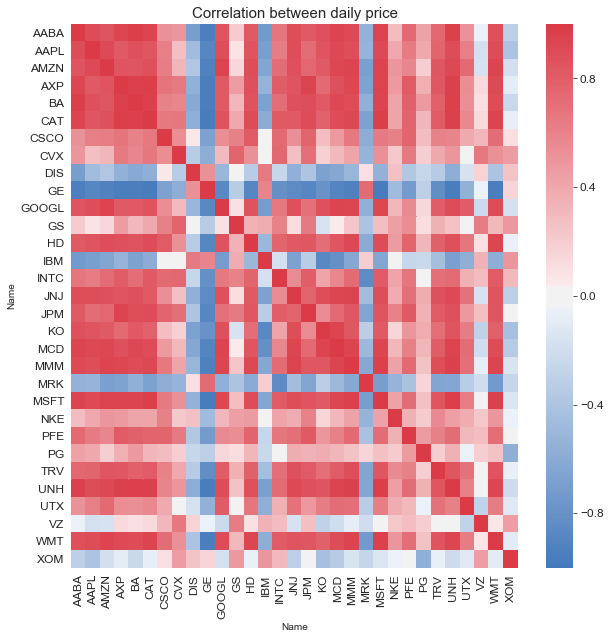

In [10]:
data01 = all_2018[['Date','Close','Name']]
data01a = data01.pivot(index='Date', columns='Name', values='Close')
corr = data01a.corr()
plt.figure(figsize=(10,10))
sns.set_style(style = 'white')
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.title('Correlation between daily price', fontsize=15)
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap=cmap,vmin=-1, vmax=1)

##### Limiting the heatmap to just 2016 now and focusing instead on the percent change in daily prices instead of closing prices. This gives a much different picture from the above. The reason is that the above chart was giving the correlation between absolute prices while the lower graph is giving the correlation between the percenage change in prices. So we can say that while prices generally move together, the actual percentage change fluctuate with less correlation.
##### Now we can see some more interesting correlation among stocks such as the somewhat high correlation between Google and Microsoft

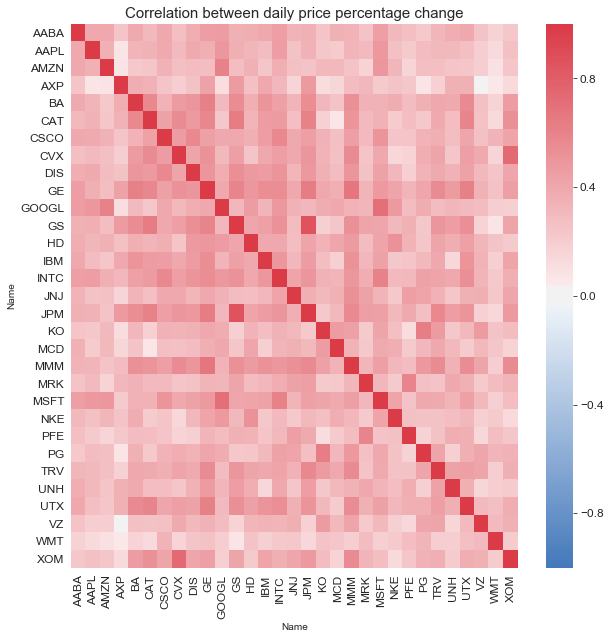

In [11]:
all_2017['Date'] = pd.to_datetime(all_2017['Date'])
data01 = all_2017[all_2017['Date'].dt.year == 2016][['Date','Close','Name']]
data01['pctchg'] = all_2017['Close'].pct_change(1)
data01a = data01.pivot(index='Date', columns='Name', values='pctchg')
corr = data01a.corr()
plt.figure(figsize=(10,10))
sns.set_style(style = 'white')
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.title('Correlation between daily price percentage change', fontsize=15)
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap=cmap,vmin=-1, vmax=1)

##### Here, the total trading volume for all stocks is charted filtered for before 2008, we can see a few peaks and troughs that stand out from the rest

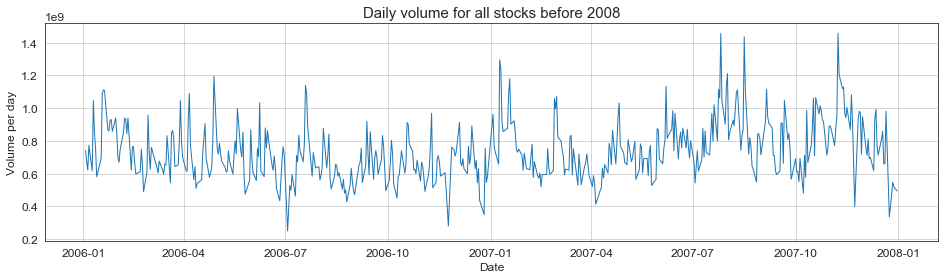

In [12]:
all_2017['Date'] = pd.to_datetime(all_2017['Date'])
data01b = all_2017[all_2017['Date'].dt.year<2008][['Date','Volume','Name']].groupby('Date', as_index=False).sum()
plt.figure(figsize=(16,4))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume per day", fontsize=12)
plt.title('Daily volume for all stocks before 2008', fontsize=15)
plt.grid()
plt.plot(data01b.Date, data01b.Volume, linestyle='-', linewidth=1)


##### Google's share volume after 2014. I wanted to see if the Google Pixel, which launched in October 2016 had any impact. It didnt, but  I found a peak in July 2015. A quick Google search shows that Google beat market expectations in their second quarter report that year. There was also a big jump in closing price on the same date as shown in the next chart. Later in Q4, I found this to be true for all tech companies

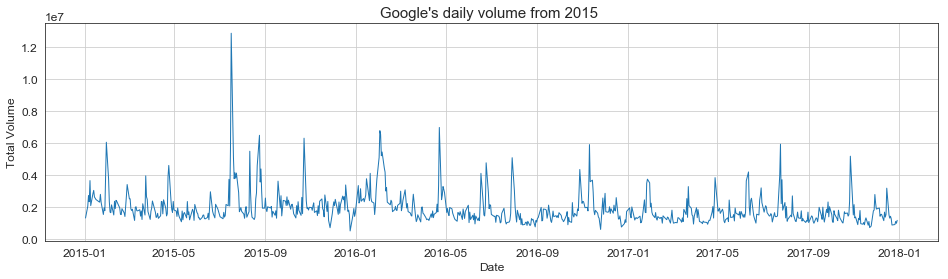

In [13]:
data01c = all_2017[(all_2017['Date'].dt.year > 2014) & (all_2017['Name'] == 'GOOGL')][['Date','Volume','Name']].groupby('Date', as_index=False).sum()
plt.figure(figsize=(16,4))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Volume", fontsize=12)
plt.grid()
plt.title('Google\'s daily volume from 2015 ' , fontsize=15)
plt.plot(data01c.Date, data01c.Volume, linestyle='-', linewidth=1)

In [14]:
data01c.iloc[data01c['Volume'].idxmax()] ## date and volume for the max volume day

Date      2015-07-17 00:00:00
Volume               12858136
Name: 135, dtype: object

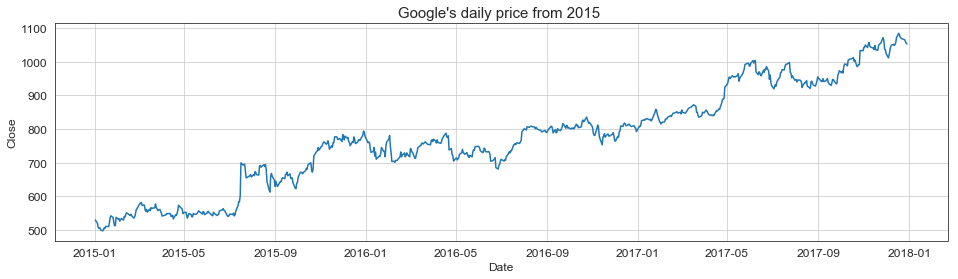

In [15]:
data01c = all_2017[(all_2017['Date'].dt.year > 2014) & (all_2017['Name'] == 'GOOGL')][['Date','Close','Name']].groupby('Date', as_index=False).sum()
plt.figure(figsize=(16,4))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close", fontsize=12)
plt.grid()
plt.title('Google\'s daily price from 2015 ' , fontsize=15)
plt.plot(data01c.Date, data01c.Close, linestyle='-', linewidth=1.5)

##### AXP stocks recovered slowly from the recession

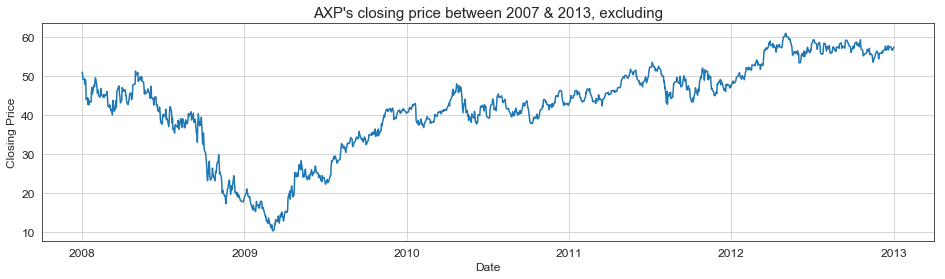

In [16]:
data01d = all_2017[(all_2017['Date'].dt.year <2013) & (all_2017['Date'].dt.year > 2007) & (all_2017['Name'] == 'AXP')][['Date','Close','Name']].groupby('Date', as_index=False).sum()
plt.figure(figsize=(16,4))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.grid()
plt.title('AXP\'s closing price between 2007 & 2013, excluding' , fontsize=15)
plt.plot(data01d.Date, data01d.Close, linestyle='-', linewidth=1.5)

##### What if I created a mutual fund out of all these stocks by buying one of each at, say, january 1st 2006, what would be my rate of return over the years? we can see that the index drops below 1 during the recession and then recovers

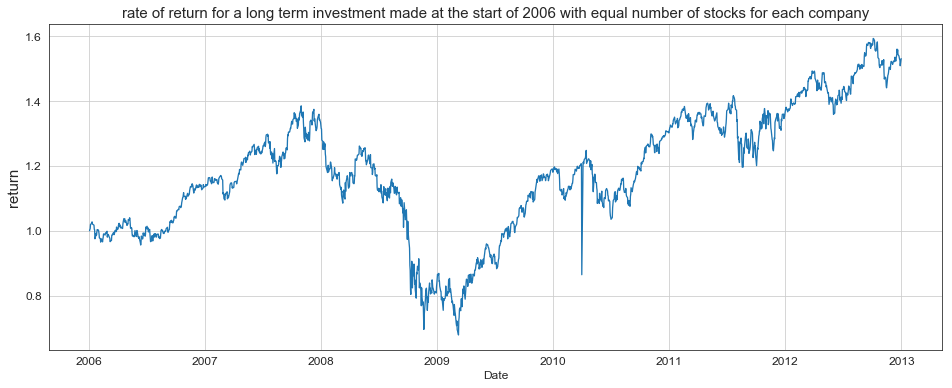

In [17]:
data01e = all_2017[all_2017['Date'].dt.year < 2013][['Date','Close','Name']].groupby('Date', as_index=False).sum()
data01e['rreturn'] = data01e['Close'].apply(lambda x: x / data01e['Close'][0])
plt.figure(figsize=(16,6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("return", fontsize=15)
plt.title('rate of return for a long term investment made at the start of 2006 with equal number of stocks for each company' , fontsize=15)
plt.grid()
plt.plot(data01e.Date, data01e.rreturn, linestyle='-', linewidth=1.3)

##### Looking at the last three years. We see a decreasing trend in the trading traffic. Or is it just an anomaly at the start of 2016?

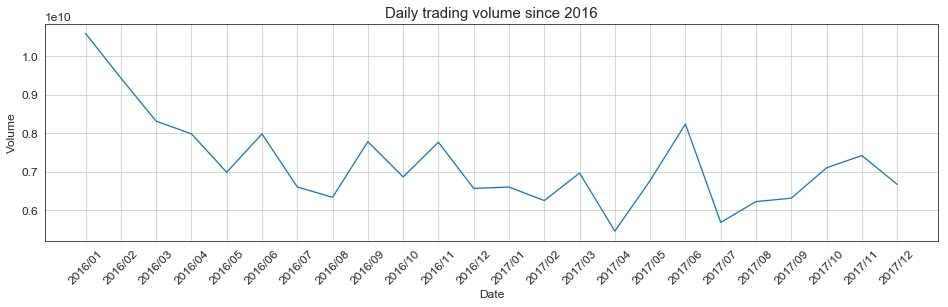

In [18]:
data01f = all_2017[(all_2017['Date'].dt.year > 2015)].copy()
data01f['Month'] = data01f['Date'].dt.strftime('%Y/%m')
data01g = data01f[['Month','Volume']].groupby(['Month'], as_index=False).sum()
plt.figure(figsize=(16,4))
plt.xticks(rotation = 45, fontsize=12); plt.yticks(rotation = 0, fontsize=12)
plt.xlabel("Date", fontsize=12); plt.ylabel("Volume", fontsize=12)
plt.grid()
plt.title('Daily trading volume since 2016' , fontsize=15)
plt.plot(data01g.Month, data01g.Volume, linestyle='-', linewidth=1.3)

##### Lets increase our time frame to see if there is actually a decrease in volume or not. We do see a decreasing trend in trading.

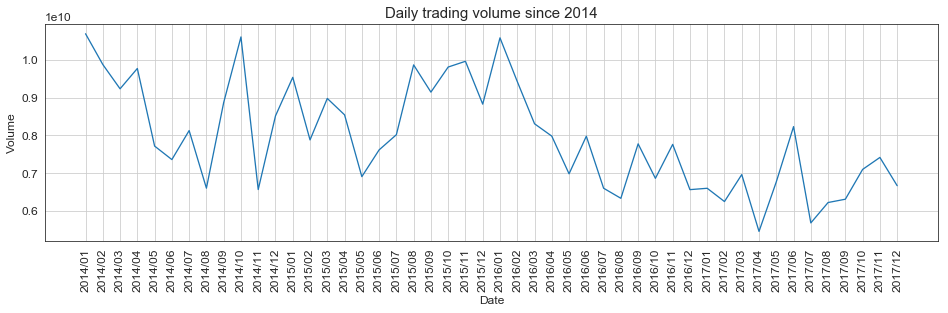

In [19]:
data01f = all_2017[(all_2017['Date'].dt.year > 2013)].copy()
data01f['Month'] = data01f['Date'].dt.strftime('%Y/%m')
data01g = data01f[['Month','Volume']].groupby(['Month'], as_index=False).sum()
plt.figure(figsize=(16,4))
plt.grid()
plt.xticks(rotation = 45, fontsize=12); plt.yticks(rotation = 0, fontsize=12)
plt.xlabel("Date", fontsize = 12); plt.ylabel("Volume", fontsize=12)
plt.xticks(rotation = 90)
plt.title('Daily trading volume since 2014' , fontsize=15)
plt.plot(data01g.Month, data01g.Volume, linestyle='-', linewidth=1.3)

###### Plotting volume and closing prices together to see if there is any relationship there. Increasing prices seem to be linked to lower trading

Text(0.5, 1.0, 'Closing Price')

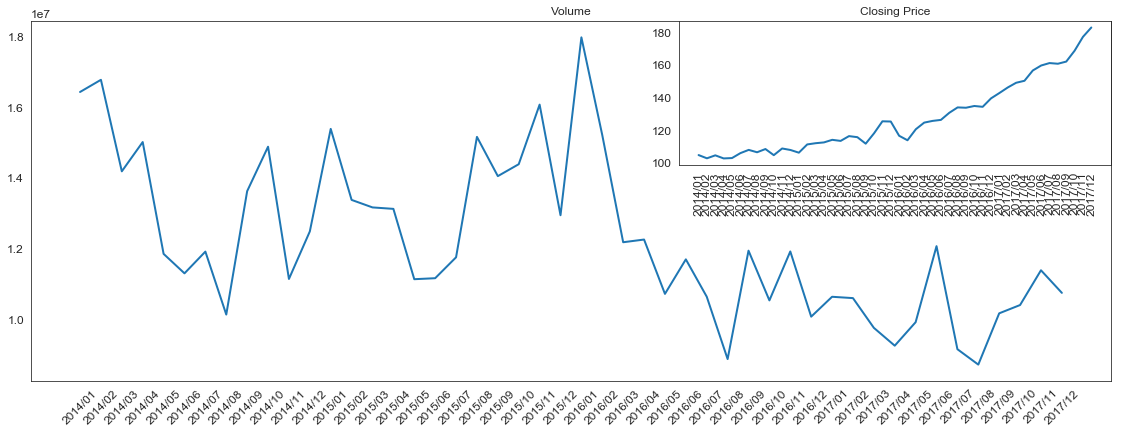

In [20]:
# Creates blank canvas
fig = plt.figure(figsize= (15,5))

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.6, 0.6, 0.4, 0.4]) # inset axes

data01g = data01f[['Month', 'Close','Volume']].groupby(['Month'], as_index=False).mean()

axes1.plot(data01g.Month, data01g.Volume, linestyle='-', linewidth=2)
axes2.plot(data01g.Month, data01g.Close, linestyle='-', linewidth=2 )

for tick in axes1.get_xticklabels():
    tick.set_rotation(45)
for tick in axes2.get_xticklabels():
    tick.set_rotation(90)
    
axes1.set_title('Volume'); axes2.set_title('Closing Price')


##### Average volume traded per day. Apple has a lot of stock trade per day. For the year 2014

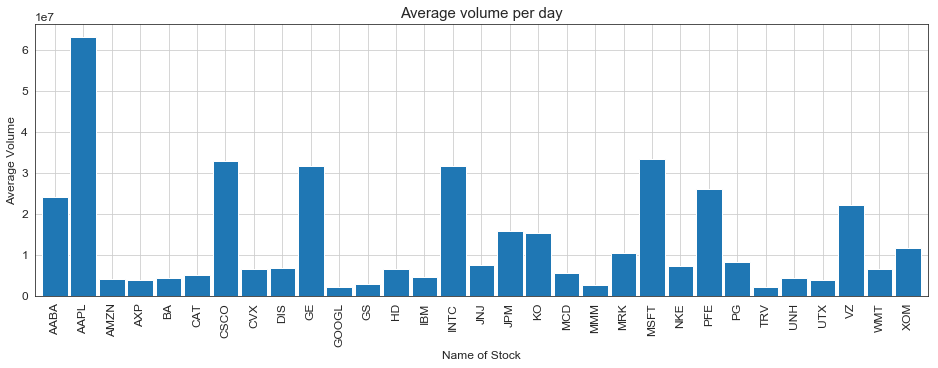

In [21]:
data01g = all_2017[all_2017['Date'].dt.year == 2014][["Volume","Name"]].groupby(["Name"]).agg({'Volume':['mean']})
fig = data01g.plot(kind='bar',fontsize=12,figsize=(16,5), width = 0.9, legend=False)
plt.xlabel('Name of Stock',fontsize=12)
plt.ylabel('Average Volume',fontsize=12)
plt.title('Average volume per day',fontsize=15)
plt.grid()
plt.show()

##### Lets check yearly trends. 2008 had the highest trading volume, possible preceeding the recession.

<BarContainer object of 12 artists>

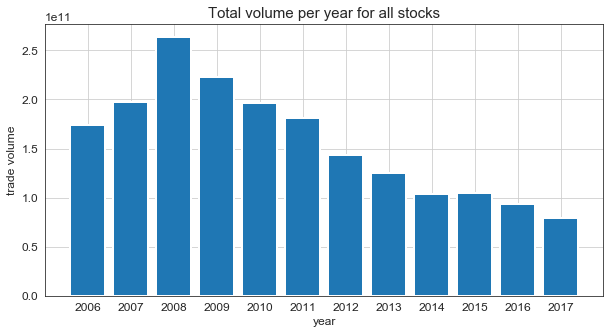

In [22]:
data01f = all_2017.copy()
data01f['Month'] = data01f['Date'].dt.year
data01g = data01f[['Month','Volume']].groupby(['Month'], as_index=False).sum()
plt.figure(figsize=(10,5))
plt.xlabel("year", fontsize=12)
plt.ylabel("trade volume", fontsize=12)
plt.xticks(data01g.Month,rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.title('Total volume per year for all stocks',fontsize=15)
plt.bar(data01g.Month, data01g.Volume, linestyle='-', linewidth=2)

###### Steve Jobs died in October 2011, a few weeks after his resignation. We see no decrease in share prices in either months. He left the company in good hands and good conditions

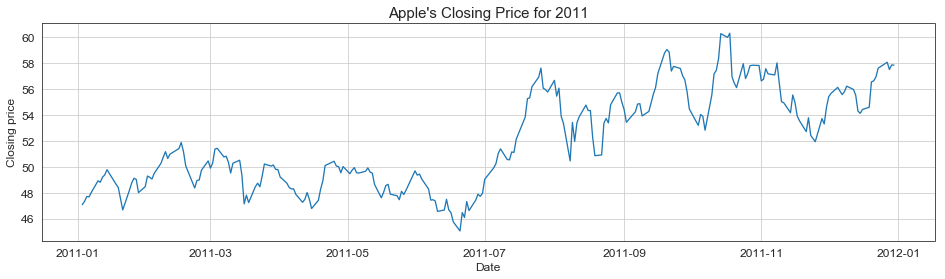

In [23]:
data01h = AAPL[pd.to_datetime(AAPL['Date']).dt.year == 2011].copy()
plt.figure(figsize=(16,4))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing price", fontsize=12)
plt.grid()
plt.title('Apple\'s Closing Price for 2011',fontsize=15)
plt.plot(pd.to_datetime(data01h.Date), data01h.Close, linestyle='-', linewidth=1.3)

##### Daily value of all trade before 2012

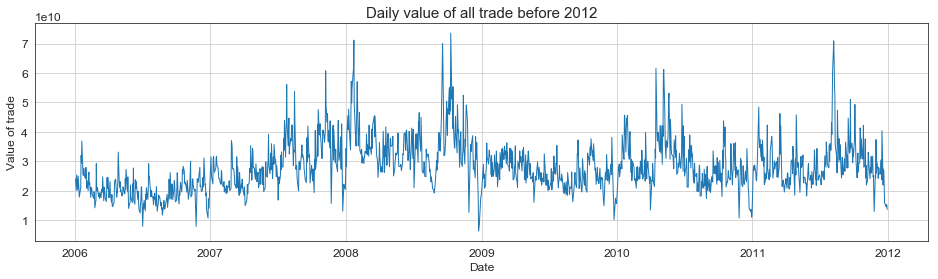

In [24]:
all_2017['Date'] = pd.to_datetime(all_2017['Date'])
data01h = all_2017
data01h['mktcap'] = data01h['Volume'] * data01h['Close'] 
data01ha = data01h[data01h['Date'].dt.year< 2012][['Date','mktcap','Name']].groupby('Date', as_index=False).sum()
plt.figure(figsize=(16,4))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value of trade", fontsize=12)
plt.title('Daily value of all trade before 2012', fontsize=15)
plt.grid()
plt.plot(data01ha.Date, data01ha.mktcap, linestyle='-', linewidth=1)


### Question 3. 
##### I have chosen Google (GOOGL) and Microsoft (MSFT) for this question as I own and use products and services from both of these companies almost every hour of the day!!! (think about gmail, outlook, windows, office, android, youtube)

##### Lets start with some basic descriptives

In [25]:
#### prepping data

GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])
MSFT['Date'] = pd.to_datetime(MSFT['Date'])

GOOGL['rreturn'] = GOOGL['Close'].apply(lambda x: x / GOOGL['Close'][0])
MSFT['rreturn'] = MSFT['Close'].apply(lambda x: x / MSFT['Close'][0])

GOOGL['dif'] = GOOGL['Close'].diff(periods=1)
MSFT['dif'] = MSFT['Close'].diff(periods=1)

GOOGL['MA3'] = GOOGL['Close'].rolling(window=3).mean()
GOOGL['MA5'] = GOOGL['Close'].rolling(window=5).mean()
GOOGL['MA7'] = GOOGL['Close'].rolling(window=7).mean()

GOOGL['rMA5'] = GOOGL['rreturn'].rolling(window=5).mean()

MSFT['MA3'] = MSFT['Close'].rolling(window=3).mean()
MSFT['MA5'] = MSFT['Close'].rolling(window=5).mean()
MSFT['MA7'] = MSFT['Close'].rolling(window=7).mean()

MSFT['rMA5'] = MSFT['rreturn'].rolling(window=5).mean()

#### combining datasets
q3a = pd.merge(GOOGL, MSFT, on = 'Date', suffixes=('_G','_MS'))
q3a.drop(['Name_G','Name_MS'], inplace= True, axis=1)

q3b = GOOGL.append(MSFT)


##### the dataset is from the start of 2006 to the end of 2017, there were 3019 trading days during this time.

In [26]:
GOOGL[AAPL.columns.values].describe(include = 'all')

,Date,Open,High,Low,Close,Volume,Name
count,3019,3019.000,3019.000,3019.000,3019.000,3019.000,3019
unique,3019,nan,nan,nan,nan,nan,1
top,2016-11-14 00:00:00,nan,nan,nan,nan,nan,GOOGL
freq,1,nan,nan,nan,nan,nan,3019
first,2006-01-03 00:00:00,nan,nan,nan,nan,nan,NaN
last,2017-12-29 00:00:00,nan,nan,nan,nan,nan,NaN
mean,NaN,428.201,431.836,424.130,428.044,3551503.536,NaN
std,NaN,236.320,237.514,234.924,236.343,3038599.265,NaN
min,NaN,131.390,134.820,123.770,128.850,521141.000,NaN
25%,NaN,247.775,250.190,244.035,247.605,1760854.000,NaN


In [27]:
MSFT[AAPL.columns.values].describe(include='all')

,Date,Open,High,Low,Close,Volume,Name
count,3019,3019.000,3019.000,3019.000,3019.000,3019.000,3019
unique,3019,nan,nan,nan,nan,nan,1
top,2016-11-14 00:00:00,nan,nan,nan,nan,nan,MSFT
freq,1,nan,nan,nan,nan,nan,3019
first,2006-01-03 00:00:00,nan,nan,nan,nan,nan,NaN
last,2017-12-29 00:00:00,nan,nan,nan,nan,nan,NaN
mean,NaN,36.497,36.828,36.173,36.513,51617615.461,NaN
std,NaN,14.683,14.742,14.620,14.695,31149577.461,NaN
min,NaN,15.200,15.620,14.870,15.150,7425603.000,NaN
25%,NaN,26.785,27.045,26.535,26.835,31365567.000,NaN


##### We can see major major differences in the trading between the two companies. Google's stock is valued much higher but the trade volume is much lower. This can imply that Microsoft's stock has been split more times over the years over the big G's. This is logical because Microsoft went public in the 80s while Google only recently had its IPO

In [28]:

q3b.groupby('Name').agg({'Date': { 'number':'count', 'start':'min', 'end':'max'}, 
                         'Close':{ 'closemax':'max', 'closemin':'min', 'closeavg':'mean' },
                         #'High': { 'highmax':'max', 'highmin':'min', 'highavg':'mean' },
                         #'Low': { 'lowmax':'max', 'lowmin':'min', 'lowavg':'mean' },
                         'Volume': { 'Volmax':'max', 'Volmin':'min', 'Volavg':'mean' }
                        })

d:\downloads\software\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Close                         Date                         Volume  \
      closeavg closemax closemin        end      start number       Volavg   
Name                                                                         
GOOGL  428.044 1085.090  128.850 2017-12-29 2006-01-03   3019  3551503.536   
MSFT    36.513   86.850   15.150 2017-12-29 2006-01-03   3019 51617615.461   

                           
        Volmin     Volmax  
Name                       
GOOGL   521141   41182889  
MSFT   7425603  591078581

##### Comparing the rates of return. Google has higher rate of return. Not surprising considering Google's rapid expansion into new markets and MS' relative failures in major investment projects such as windows mobile

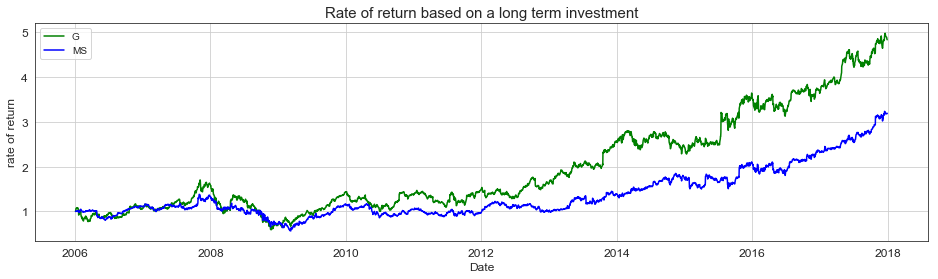

In [29]:
plt.figure(figsize=(16,4))
#plt.plot(pd.to_datetime(data01h.Date), data01h.Close, linestyle='-', linewidth=2)
plt.plot(pd.to_datetime(q3a.Date), q3a.rreturn_G, color = 'green', label = 'G')
plt.plot(pd.to_datetime(q3a.Date), q3a.rreturn_MS, color = 'blue', label = 'MS')
plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('rate of return',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rate of return based on a long term investment',fontsize=15)
plt.grid()
plt.show()

##### Lets compare moving averages of closing prices now, we can see that MA7 smoothes nicely, but lags quite a bit behind the actual stock market

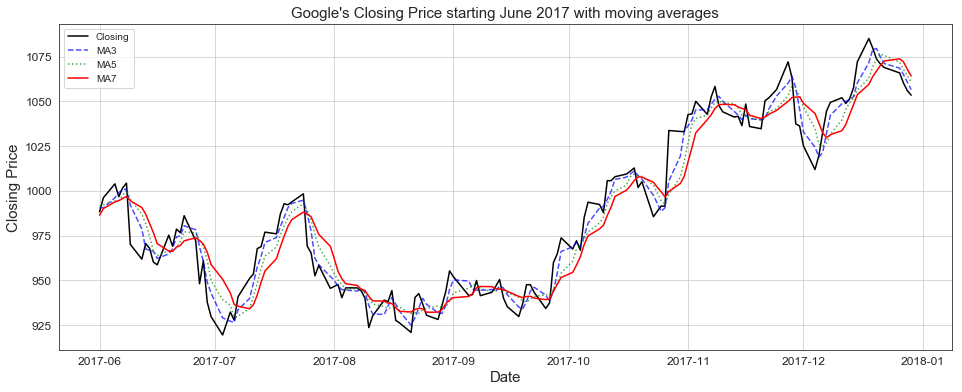

In [30]:
q3a1 = q3a[q3a['Date'] > '2017-5-31']
plt.figure(figsize= (16,6))
plt.plot(pd.to_datetime(q3a1.Date), q3a1.Close_G, color = 'black', label = 'Closing')
plt.plot(pd.to_datetime(q3a1.Date), q3a1.MA3_G, color = 'blue',alpha=0.7, linestyle = 'dashed' , label = 'MA3')
plt.plot(pd.to_datetime(q3a1.Date), q3a1.MA5_G, color = 'green',alpha=0.7, linestyle = 'dotted', label = 'MA5')
plt.plot(pd.to_datetime(q3a1.Date), q3a1.MA7_G, color = 'red',alpha=1, label = 'MA7')
plt.legend()
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Google\'s Closing Price starting June 2017 with moving averages' ,fontsize=15)
plt.grid()
plt.show()

#### lets compare moving average for rate of returns for the first few years of the data, we can see that the rate of returns were close back then. But after the recession, there is no stopping Google

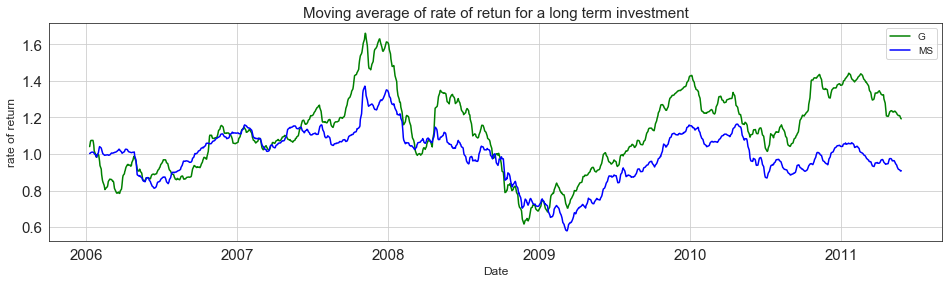

In [55]:
q3a1 = q3a[q3a['Date'] < '2011-5-31']
plt.figure(figsize= (16,4)) 
#plt.plot(pd.to_datetime(q3a1.Date), q3a1.rreturn_G, color = 'green', label = 'G') #doesnt look nice
#plt.plot(pd.to_datetime(q3a1.Date), q3a1.rreturn_MS, color = 'blue', label = 'MS')
plt.plot(pd.to_datetime(q3a1.Date), q3a1.rMA5_G, color = 'green', label = 'G')
plt.plot(pd.to_datetime(q3a1.Date), q3a1.rMA5_MS, color = 'blue', label = 'MS')
plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('rate of return',fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Moving average of rate of retun for a long term investment',fontsize=15)
plt.grid()
plt.show()

##### Lets also plot the daily changes in price for the last 6 months or so. Google's stock looks to be be much more volatile. Don't be fooled though. We already saw that Google's share price is much higher. So it is possible that the percentage change for MS shares is higher. 
##### Plotting the percentage change in share prices, we can see that the stock prices move much more closely in terms of percentage change

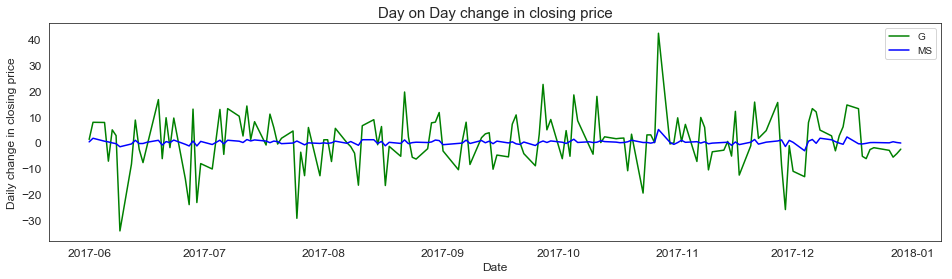

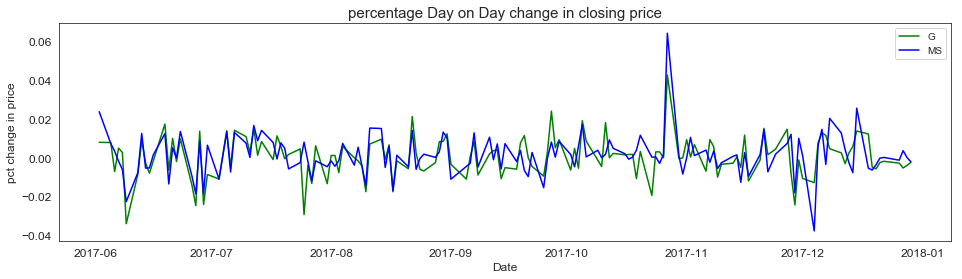

In [32]:
q3a1 = q3a[q3a['Date'] > '2017-05-31'].copy()

plt.figure(1, figsize= (16,4)) 
plt.plot(pd.to_datetime(q3a1.Date), q3a1.dif_G, color = 'green', label = 'G')
plt.plot(pd.to_datetime(q3a1.Date), q3a1.dif_MS, color = 'blue', label = 'MS')
plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('Daily change in closing price',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Day on Day change in closing price', fontsize=15)
plt.show()

q3a1 = q3a[q3a['Date'] > '2017-05-31'].copy()
q3a1['pct_G'] = q3a1['Close_G'].pct_change(periods=1)
q3a1['pct_MS'] = q3a1['Close_MS'].pct_change(periods=1)
plt.figure(2,figsize= (16,4)) 
plt.plot(pd.to_datetime(q3a1.Date), q3a1.pct_G, color = 'green', label = 'G')
plt.plot(pd.to_datetime(q3a1.Date), q3a1.pct_MS, color = 'blue', label = 'MS')
plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('pct change in price',fontsize=12)
plt.title('percentage Day on Day change in closing price', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


##### looking at the candlestick charts for the last 30 and the last 120 trading days for both Google and Microsoft
##### The big jump is around October 27th. Tech companies beat forecasts and hence had this boom

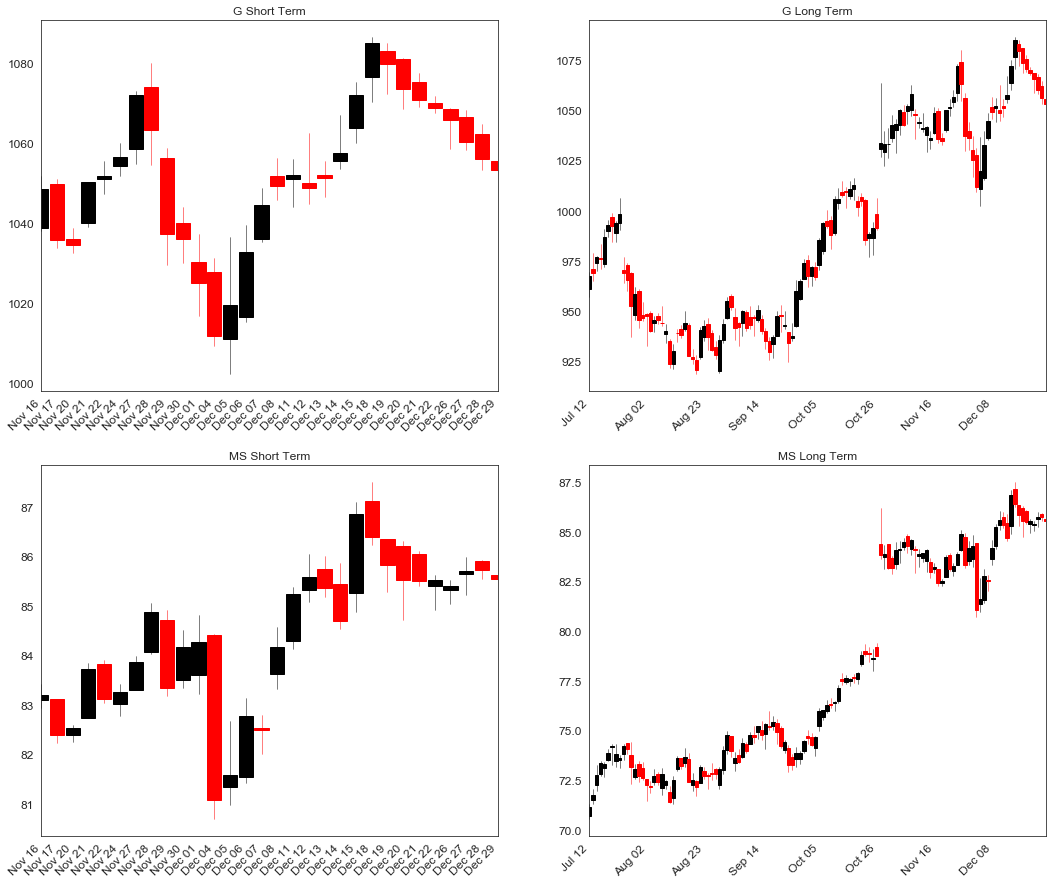

In [33]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(18,15))
GOOGL["Date2"] = GOOGL["Date"].apply(mdates.date2num)
MSFT["Date2"] = MSFT["Date"].apply(mdates.date2num)
weekday_candlestick(GOOGL[['Date2', 'Open', 'High', 'Low','Close']].copy().tail(30), ax=axes[0,0], fmt='%b %d', freq=1, width=0.9,colorup='black', colordown='red')
weekday_candlestick(MSFT[['Date2', 'Open', 'High', 'Low','Close']].copy().tail(30), ax=axes[1,0], fmt='%b %d', freq=1, width=0.9,colorup='black', colordown='red')
weekday_candlestick(GOOGL[['Date2', 'Open', 'High', 'Low','Close']].copy().tail(120), ax=axes[0,1], fmt='%b %d', freq=15, width=0.9,colorup='black', colordown='red')
weekday_candlestick(MSFT[['Date2', 'Open', 'High', 'Low','Close']].copy().tail(120), ax=axes[1,1], fmt='%b %d', freq=15, width=0.9,colorup='black', colordown='red')
axes[0,0].set_title('G Short Term')
axes[1,0].set_title('MS Short Term')
axes[0,1].set_title('G Long Term')
axes[1,1].set_title('MS Long Term')
plt.show()

###### Monthly trends

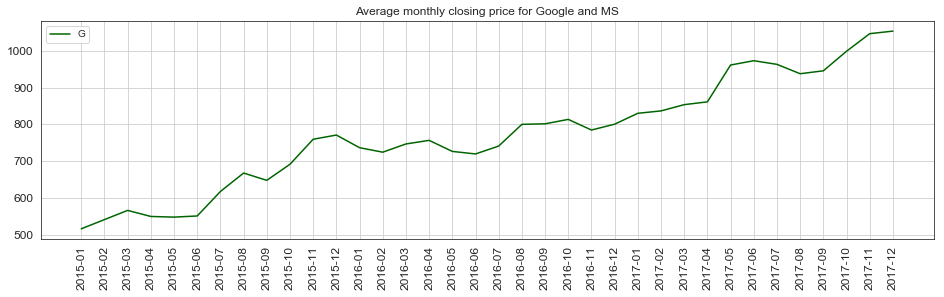

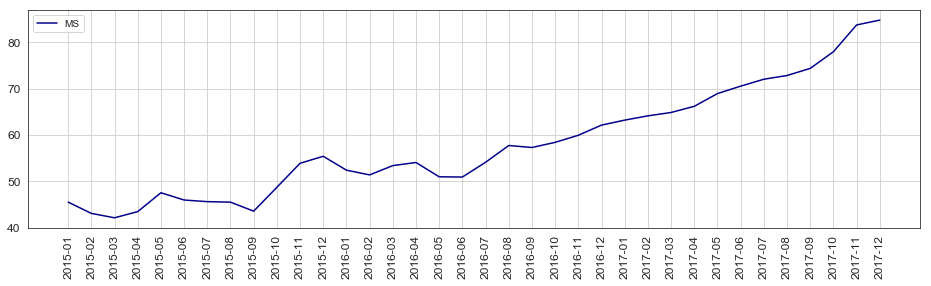

In [34]:
q3a2 = q3a[q3a['Date'].dt.year>2014].copy()
q3a2['yearmonth'] = q3a2['Date'].dt.strftime('%Y-%m')
q3a2['year'] = q3a2['Date'].dt.strftime('%Y')
q3a2 = q3a2.groupby('yearmonth', as_index=False).mean()
plt.figure(figsize=(16,4))
plt.title('Average monthly closing price for Google and MS')
plt.plot(q3a2.yearmonth,q3a2.Close_G, label='G', color = 'darkgreen')
plt.grid()
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
plt.plot(q3a2.yearmonth,q3a2.Close_MS, label='MS', color = 'darkblue')
plt.grid()
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

##### Monthly percentage change in closing price

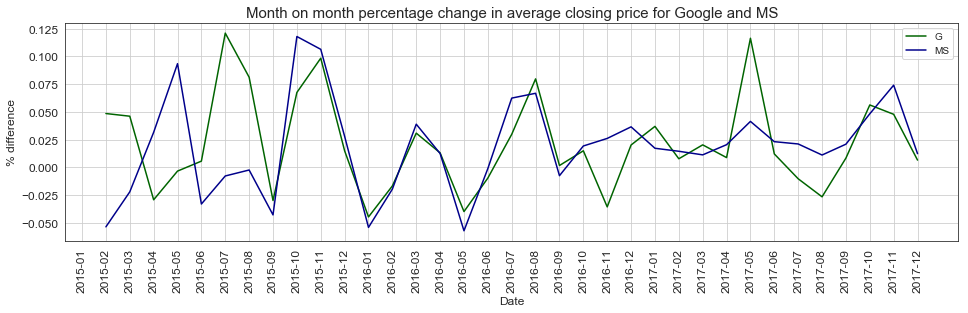

In [35]:
q3a2 = q3a[q3a['Date'].dt.year>2014].copy()
q3a2['yearmonth'] = q3a2['Date'].dt.strftime('%Y-%m')
q3a2['year'] = q3a2['Date'].dt.strftime('%Y')
q3a2 = q3a2.groupby('yearmonth', as_index=False).mean()
q3a2['pct_G'] = q3a2.Close_G.pct_change(1)
q3a2['pct_MS'] = q3a2.Close_MS.pct_change(1)
plt.figure(figsize=(16,4))
plt.title('Month on month percentage change in average closing price for Google and MS', fontsize=15)
plt.plot(q3a2.yearmonth,q3a2.pct_G, label='G', color = 'darkgreen')
plt.plot(q3a2.yearmonth,q3a2.pct_MS, label='MS', color = 'darkblue')
plt.grid()
plt.xlabel('Date', fontsize = 12), plt.ylabel('% difference', fontsize = 12)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

###### Monthly trade volume

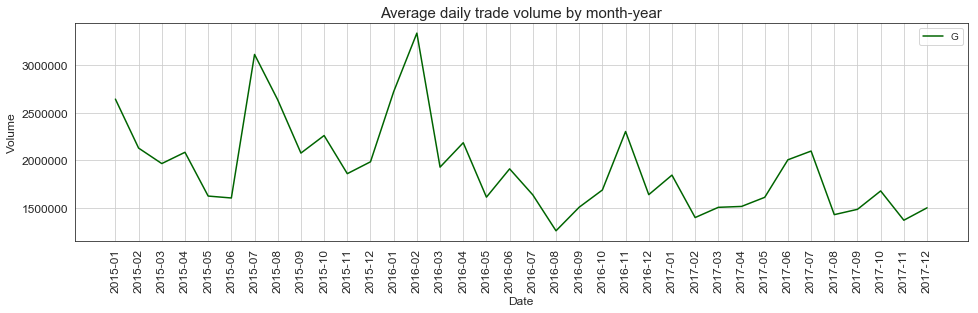

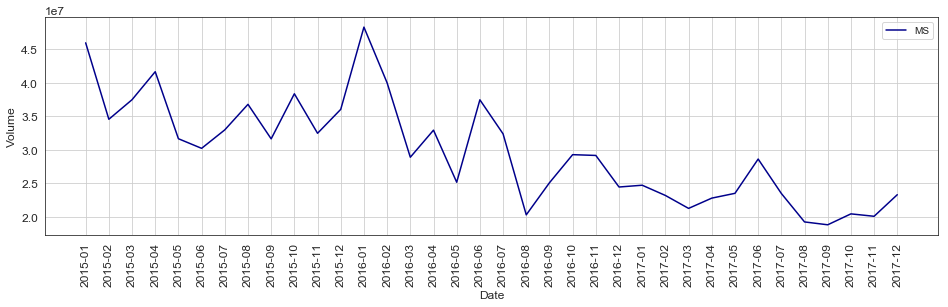

In [36]:
q3a2 = q3a[q3a['Date'].dt.year>2014].copy()
q3a2['yearmonth'] = q3a2['Date'].dt.strftime('%Y-%m')
q3a2['year'] = q3a2['Date'].dt.strftime('%Y')
q3a2 = q3a2.groupby('yearmonth', as_index=False).mean()
plt.figure(figsize=(16,4))
plt.title('Average daily trade volume by month-year', fontsize=15)
plt.plot(q3a2.yearmonth,q3a2.Volume_G, label='G', color = 'darkgreen')
plt.xlabel('Date', fontsize = 12), plt.ylabel('Volume', fontsize = 12)
plt.grid()
plt.xticks(rotation='vertical')
plt.legend()
plt.show()
plt.figure(figsize=(16,4))
plt.plot(q3a2.yearmonth,q3a2.Volume_MS, label='MS', color = 'darkblue')
plt.xlabel('Date', fontsize = 12), plt.ylabel('Volume', fontsize = 12)
plt.grid()
plt.xticks(rotation='vertical')

plt.legend()
plt.show()

##### Yearly trend of average closing price

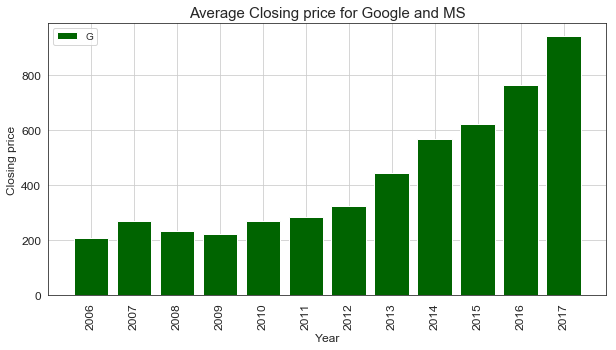

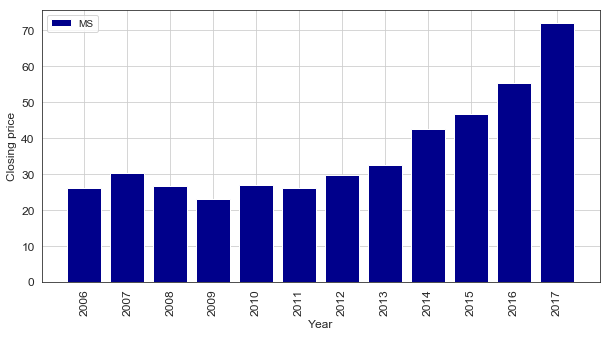

In [37]:
q3a2 = q3a[q3a['Date'].dt.year>2000].copy()
q3a2['yearmonth'] = q3a2['Date'].dt.strftime('%Y-%m')
q3a2['year'] = q3a2['Date'].dt.strftime('%Y')
q3a2 = q3a2.groupby('year', as_index=False).mean()
plt.figure(figsize=(10,5))
plt.bar(q3a2.year,q3a2.Close_G, label='G', color = 'darkgreen')
plt.title('Average Closing price for Google and MS', fontsize=15)
plt.xlabel('Year', fontsize = 12), plt.ylabel('Closing price', fontsize = 12)
plt.grid()
plt.xticks(rotation='vertical')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.bar(q3a2.year,q3a2.Close_MS, label='MS', color = 'darkblue')
plt.xlabel('Year', fontsize = 12), plt.ylabel('Closing price', fontsize = 12)
plt.grid()
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

##### yearly Volume

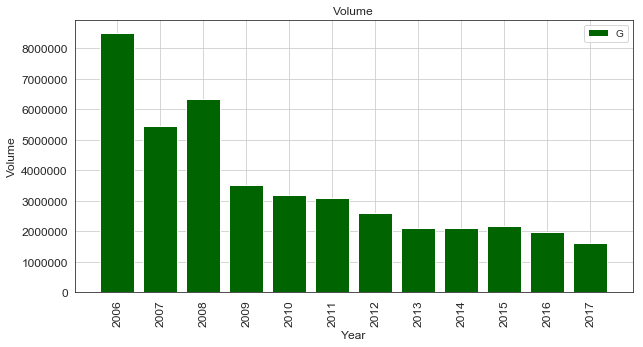

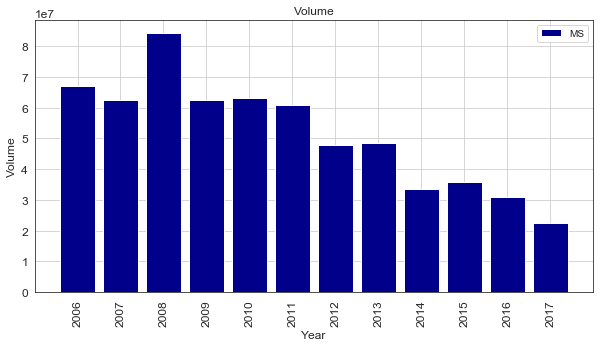

In [38]:
q3a2 = q3a[q3a['Date'].dt.year>2000].copy()
q3a2['yearmonth'] = q3a2['Date'].dt.strftime('%Y-%m')
q3a2['year'] = q3a2['Date'].dt.strftime('%Y')
q3a2 = q3a2.groupby('year', as_index=False).mean()
plt.figure(figsize=(10,5))
plt.bar(q3a2.year,q3a2.Volume_G, label='G', color = 'darkgreen')
plt.title('Average daily volume by year for Google and MS', fontsize=15)
plt.xlabel('Year', fontsize = 12), plt.ylabel('Volume', fontsize = 12)
plt.grid()
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Volume')
plt.show()
plt.figure(figsize=(10,5))
plt.bar(q3a2.year,q3a2.Volume_MS, label='MS', color = 'darkblue')
plt.xlabel('Year', fontsize = 12), plt.ylabel('Volume', fontsize = 12)
plt.grid()
plt.xticks(rotation='vertical')
plt.title('Volume')
plt.legend()
plt.show()

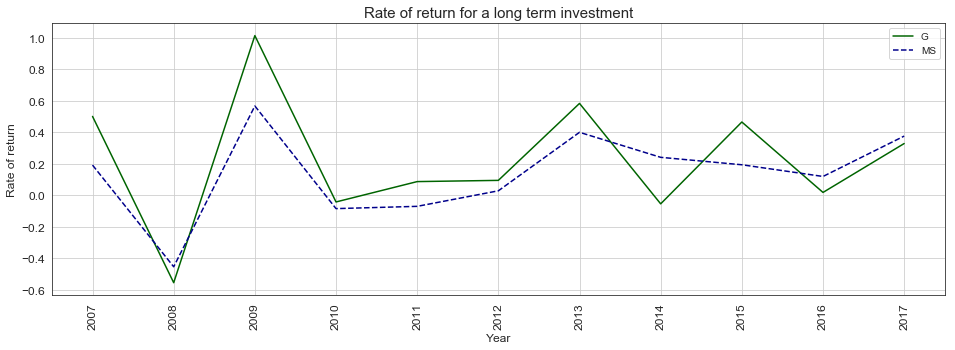

In [39]:
q3a2 = q3a[q3a['Date'].dt.year>2000].copy()
q3a2['yearmonth'] = q3a2['Date'].dt.strftime('%Y-%m')
q3a2['year'] = q3a2['Date'].dt.strftime('%Y')
q3a2 = q3a2.groupby('year', as_index=False).last()
q3a2['rreturn'] = q3a2.Close_G.pct_change(1)
q3a2['rreturn_MS'] = q3a2.Close_MS.pct_change(1)
plt.figure(figsize=(16,5))
plt.plot(q3a2.year,q3a2.rreturn, label='G', color = 'darkgreen')
plt.plot(q3a2.year,q3a2.rreturn_MS, label='MS',linestyle = 'dashed', color = 'darkblue')
plt.xlabel('Year', fontsize = 12), plt.ylabel('Rate of return', fontsize = 12)
plt.grid()
plt.xticks(rotation='vertical')
plt.title('Rate of return for a long term investment', fontsize=15)
plt.legend()
plt.show()

# Question 4

In [40]:
### importing the files again to start clean
data = []
for file in sorted(os.listdir()):
    data.append(file)

filenames = pd.DataFrame(data, columns=['File'])
filenames['paths'] = filenames['File']
filenames['File'] = filenames['File'].str.split('_',1,expand=True)
filenames['File'][31] = 'all_2017'
filenames['File'][32] = 'all_2018'

for i in filenames['File']:
    #exec('{} = pd.DataFrame()'.format(i) ) 
    exec('{} = pd.read_csv({})'.format(str(i),"filenames[filenames['File']== i].iloc[0,1]"))

###### Combining the datasets for five companies and then running the basic descriptives

In [41]:
def prepdata(df):
    df['rreturn'] = df['Close'].apply(lambda x: x / df['Close'][0])
    df['ma3'] = df['Close'].rolling(window=3).mean()
    df['ma5'] = df['Close'].rolling(window=5).mean()
    df['ma7'] = df['Close'].rolling(window=7).mean()
    df['rma7'] = df['rreturn'].rolling(window=7).mean()
    df['pricediff'] = df['Close'].diff(periods=1)
    df['pctchange'] = df['Close'].pct_change(periods=1)
    df['pctchangem'] = df['Close'].pct_change(periods=21)
    df['pctchangeyr'] = df['Close'].pct_change(periods=253)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date2'] = df['Date'].apply(mdates.date2num)
    df['YM'] = df['Date'].dt.strftime('%Y/%m')
    df['Y'] = df['Date'].dt.year
    df['gain'] = df['Close'] - df['Open']
    df['gain2'] = df['Close']/df['Open']
    df['mktcap'] = df['Close']*df['Volume']
    return df

# Choosing Apple, Amazon, Microsoft, Google and IBM
list_of_datasets = [AAPL, AMZN, MSFT, GOOGL, IBM]
for i in list_of_datasets:
    i = prepdata(i)

# Combining datasets
#q4a = pd.merge(GOOGL, MSFT, on = 'Date', suffixes=('_G','_MS'))
q4b = GOOGL.append(MSFT).append(AMZN).append(IBM).append(AAPL)

##### Despite being in the same industry, we do see some differences in stock. AAPL and MSFT trade a lot in terms of volume but their prices are lower than the rest. GOOGL has the higest average price and IBM has the lease trade volume

In [42]:
q4b.groupby('Name').agg({'Date': { 'number':'count', 'start':'min', 'end':'max'}, 
                         'Close':{ 'closemax':'max', 'closemin':'min', 'closeavg':'mean' },
                         'Volume': { 'Volmax':'max', 'Volmin':'min', 'Volavg':'mean' }
                        })

d:\downloads\software\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Close                         Date                          Volume  \
      closeavg closemax closemin        end      start number        Volavg   
Name                                                                          
AAPL    64.663  176.420    7.240 2017-12-29 2006-01-03   3019 131145687.664   
AMZN   299.376 1195.830   26.070 2017-12-29 2006-01-03   3019   5931712.402   
GOOGL  428.044 1085.090  128.850 2017-12-29 2006-01-03   3019   3551503.536   
IBM    145.617  215.800   71.740 2017-12-29 2006-01-03   3020   5773300.623   
MSFT    36.513   86.850   15.150 2017-12-29 2006-01-03   3019  51617615.461   

                            
         Volmin     Volmax  
Name                        
AAPL   11475922  843264044  
AMZN     986435  104404589  
GOOGL    521141   41182889  
IBM      254256   30774276  
MSFT    7425603  591078581

##### Heatmap of the percentage change in daily price. All of the stocks are moderately correlated.

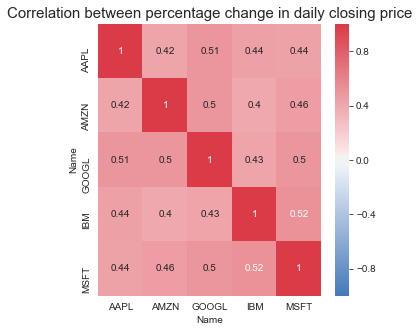

In [43]:
t1 = q4b[['Date','pctchange','Name']]
t1 = t1.pivot(index='Date', columns='Name', values='pctchange')
corr = t1.corr()
plt.figure(figsize=(5,5))
sns.set_style(style = 'white')
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.title('Correlation between percentage change in daily closing price', fontsize=15)
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap=cmap,vmin=-1, vmax=1)

##### yearly correlation on percent change is more varied, Apple is very negatively correlated to Google. This possibly means that even though daily stock movement is somewhat correlated, the long term movement is different

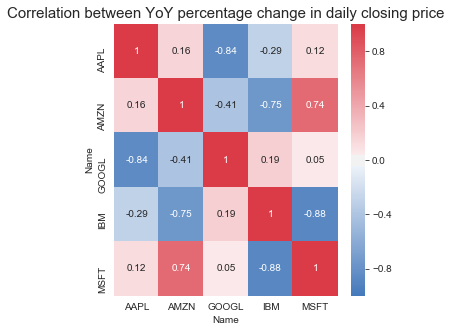

In [44]:
t1a = q4b[['Y','Close','Name']].groupby(['Y','Name'], as_index = False).mean()
t1a['pctchangeyr'] = t1a['Close'].pct_change(periods=1)
t1b = t1a.pivot(index='Y', columns='Name', values='pctchangeyr')
corr = t1b.corr()
plt.figure(figsize=(5,5))
sns.set_style(style = 'white')
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.title('Correlation between YoY percentage change in daily closing price', fontsize=15)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True,cmap=cmap,vmin=-1, vmax=1)

In [45]:
list_of_dataset = ['MSFT', 'AMZN', 'GOOGL', 'AAPL', 'IBM']

##### Daily trade volume for the stocks in 2017. MSFT and AAPL have much higer trade volume while GOOGL has the lowest

Text(0.5, 1.0, 'Daily Volume for selected stocks for 2017')

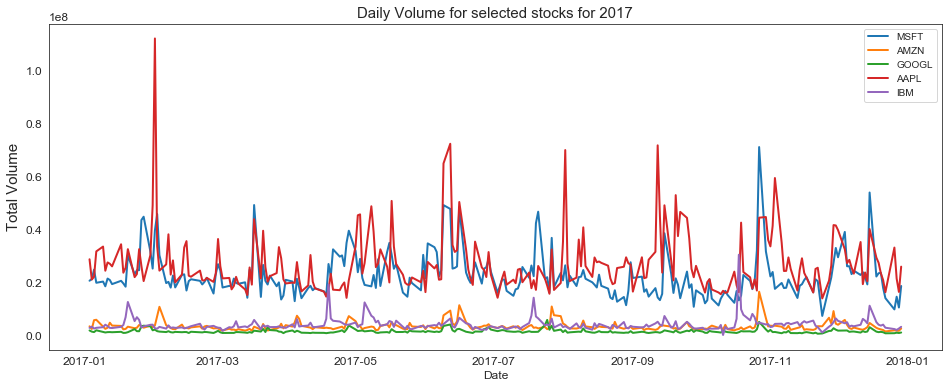

In [46]:
t2 = q4b[q4b['Date'].dt.year>2016][['Date','Volume','Name']].copy()
plt.figure(figsize=(16,6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Volume", fontsize=15)
for i in list_of_dataset:
    t2a = t2[t2['Name'] == i]
    plt.plot(t2a.Date, t2a.Volume, linestyle='-', linewidth=2, label=i)
plt.legend()
plt.title('Daily Volume for selected stocks for 2017', fontsize=15)

##### Closing price of the stocks. The increase in AMZN and GOOGL stocks is quite evident. But the trend in the other stocks is not so clear from this chart

Text(0.5, 1.0, 'Closing price since Jan 2015')

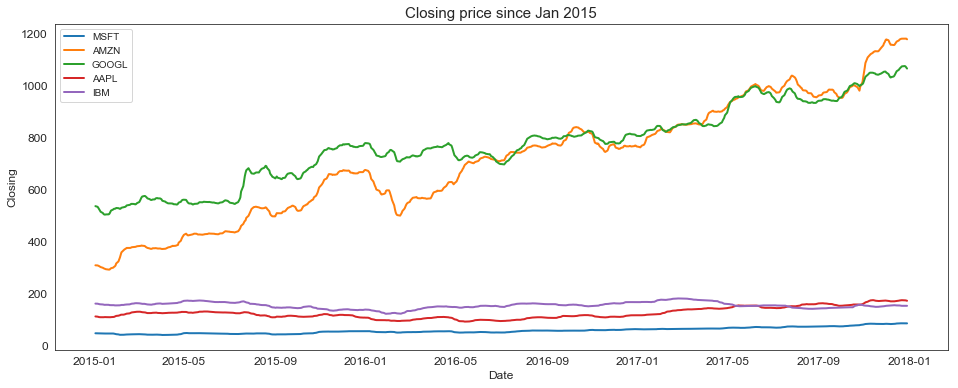

In [47]:
t2 = q4b[q4b['Date'].dt.year>2014][['Date','ma7','Name']].copy()
plt.figure(figsize=(16,6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing", fontsize=12)
for i in list_of_dataset:
    t2a = t2[t2['Name'] == i]
    plt.plot(t2a.Date, t2a.ma7, linestyle='-', linewidth=2, label=i)
plt.legend()
plt.title('Closing price since Jan 2015', fontsize=15)

#### plotting it as a mutual fund instead. Amazon had the highest rate of return between the five stocks followed by Apple.
##### Amazon surpassed Apple in Q3 in 2015.

Text(0.5, 1.0, 'Rate of return on a long term investment made at jan 2016')

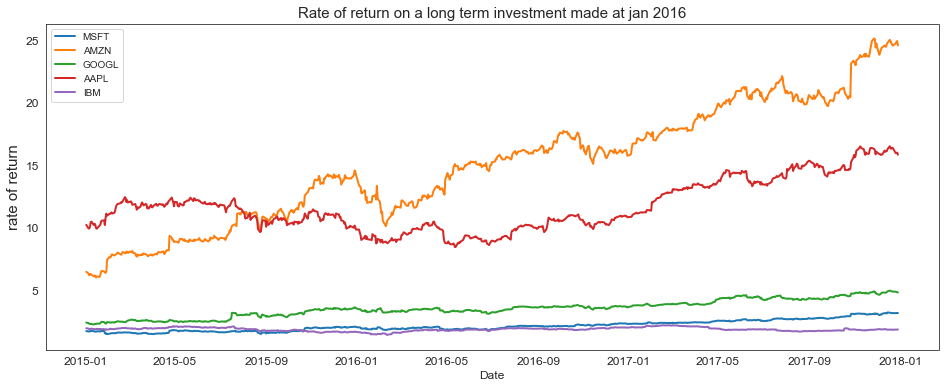

In [48]:
t2 = q4b[q4b['Date'].dt.year>2014][['Date','rreturn','Name']].copy()
plt.figure(figsize=(16,6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("rate of return", fontsize=15)
for i in list_of_dataset:
    t2a = t2[t2['Name'] == i]
    plt.plot(t2a.Date, t2a.rreturn, linestyle='-', linewidth=2, label=i)
plt.legend()
plt.title('Rate of return on a long term investment made at jan 2016', fontsize=15)

##### Monthly rate of return since 2013, both month on month and for a long term investment (perhaps as a mutual fund)

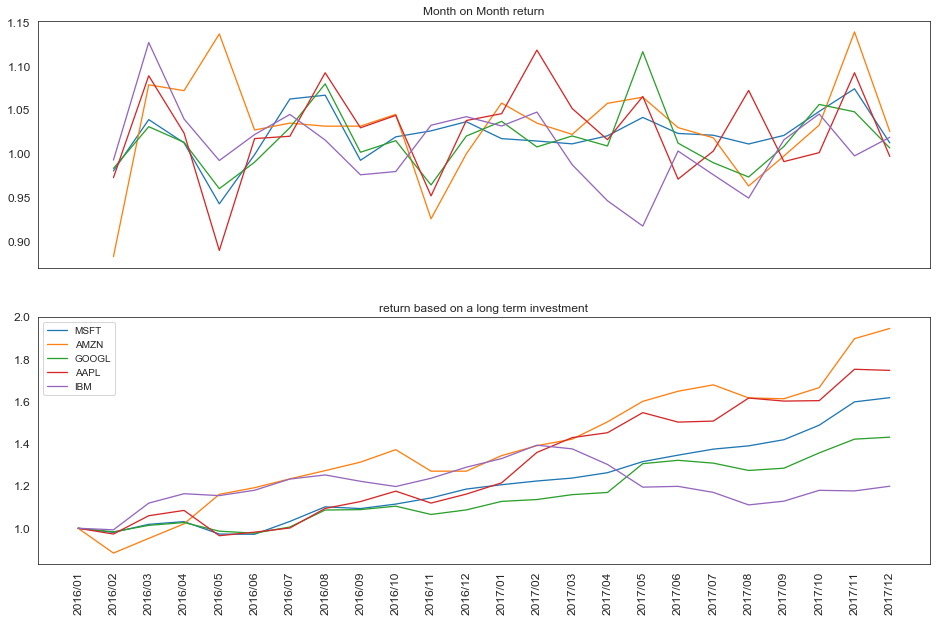

In [49]:
t3 = q4b[q4b['Date'].dt.year>2015][['YM','Close','Name']].copy().groupby(['YM','Name'], as_index = False).mean()

fig, axarr = plt.subplots(2, sharex=True,figsize=(16,10))
axarr[0].set_title('Month on Month return')
axarr[1].set_title('return based on a long term investment')
plt.xticks(rotation=90)

for i in list_of_dataset:
    t3a = t3[t3['Name'] == i].copy().reset_index()
    t3a['rreturn_MoM'] = t3a['Close']/ t3a['Close'].shift(1)
    t3a['rreturn_index'] = t3a['Close'].apply(lambda x: x / t3a['Close'][0] )
    axarr[0].plot(t3a.YM, t3a.rreturn_MoM, linestyle='-', linewidth=1.3, label=i)
    axarr[1].plot(t3a.YM, t3a.rreturn_index, linestyle='-', linewidth=1.3, label=i)
plt.legend()

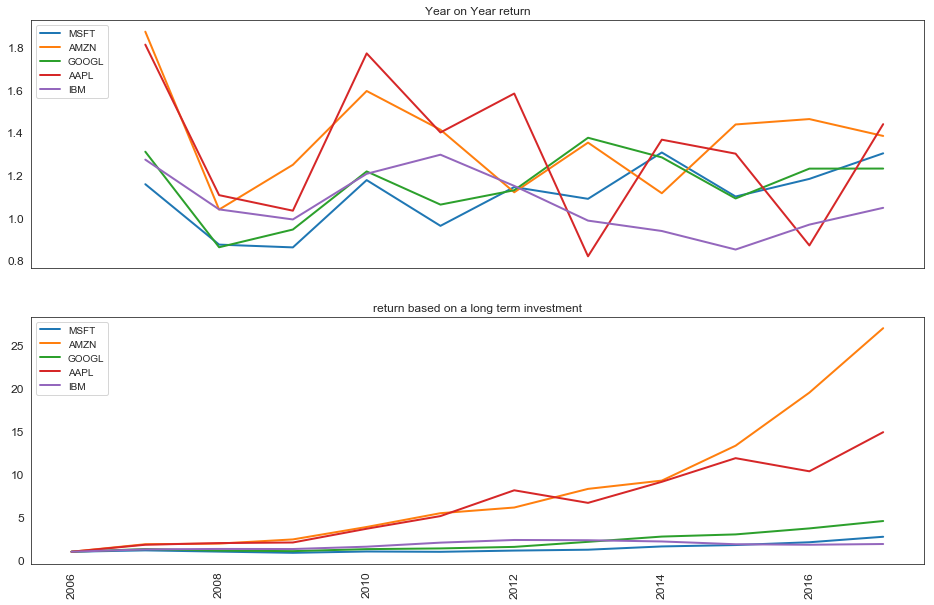

In [50]:
t3 = q4b[q4b['Date'].dt.year>2005][['Y','Close','Name']].copy().groupby(['Y','Name'], as_index = False).mean()

fig, axarr = plt.subplots(2, sharex=True,figsize=(16,10))
axarr[0].set_title('Year on Year return')
axarr[1].set_title('return based on a long term investment')
plt.xticks(rotation=90)

for i in list_of_dataset:
    t3a = t3[t3['Name'] == i].copy().reset_index()
    t3a['rreturn_yoy'] = t3a['Close']/ t3a['Close'].shift(1)
    t3a['rreturn_index'] = t3a['Close'].apply(lambda x: x / t3a['Close'][0] )
    axarr[0].plot(t3a.Y, t3a.rreturn_yoy, linestyle='-', linewidth=2, label=i)
    axarr[1].plot(t3a.Y, t3a.rreturn_index, linestyle='-', linewidth=2, label=i)
    axarr[0].legend(loc=2); axarr[1].legend(loc=2)
plt.legend()

##### plotting the daily difference in closing prices for the last 60 trading days

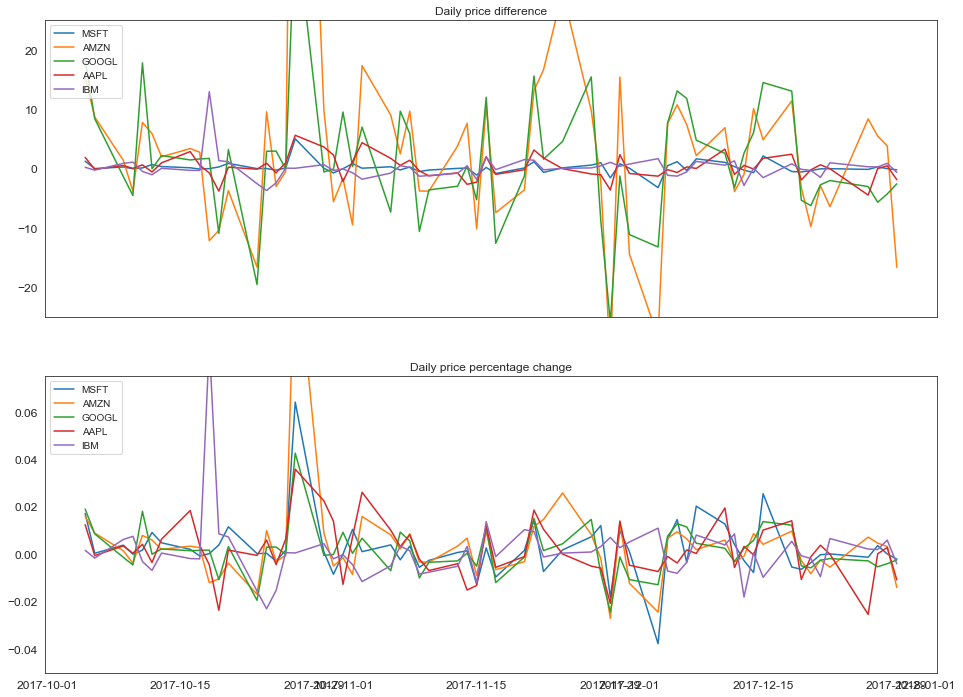

In [51]:
t4 = q4b[q4b['Date'].dt.year>2016][['Date','pricediff','pctchange','Name']].copy()

fig, axarr = plt.subplots(2, sharex=True,figsize=(16,12))
axarr[0].set_title('Daily price difference')
axarr[1].set_title('Daily price percentage change')
axarr[0].set_ylim([-25, 25]); axarr[1].set_ylim([-0.05, 0.075])


for i in list_of_dataset:
    t4a = t4[t4['Name'] == i].copy().reset_index().tail(60)
    axarr[0].plot(t4a.Date, t4a.pricediff, linestyle='-', label=i)
    axarr[1].plot(t4a.Date, t4a.pctchange, linestyle='-', label=i)
axarr[0].legend(loc=2); axarr[1].legend(loc=2)

#### Candlestick charts

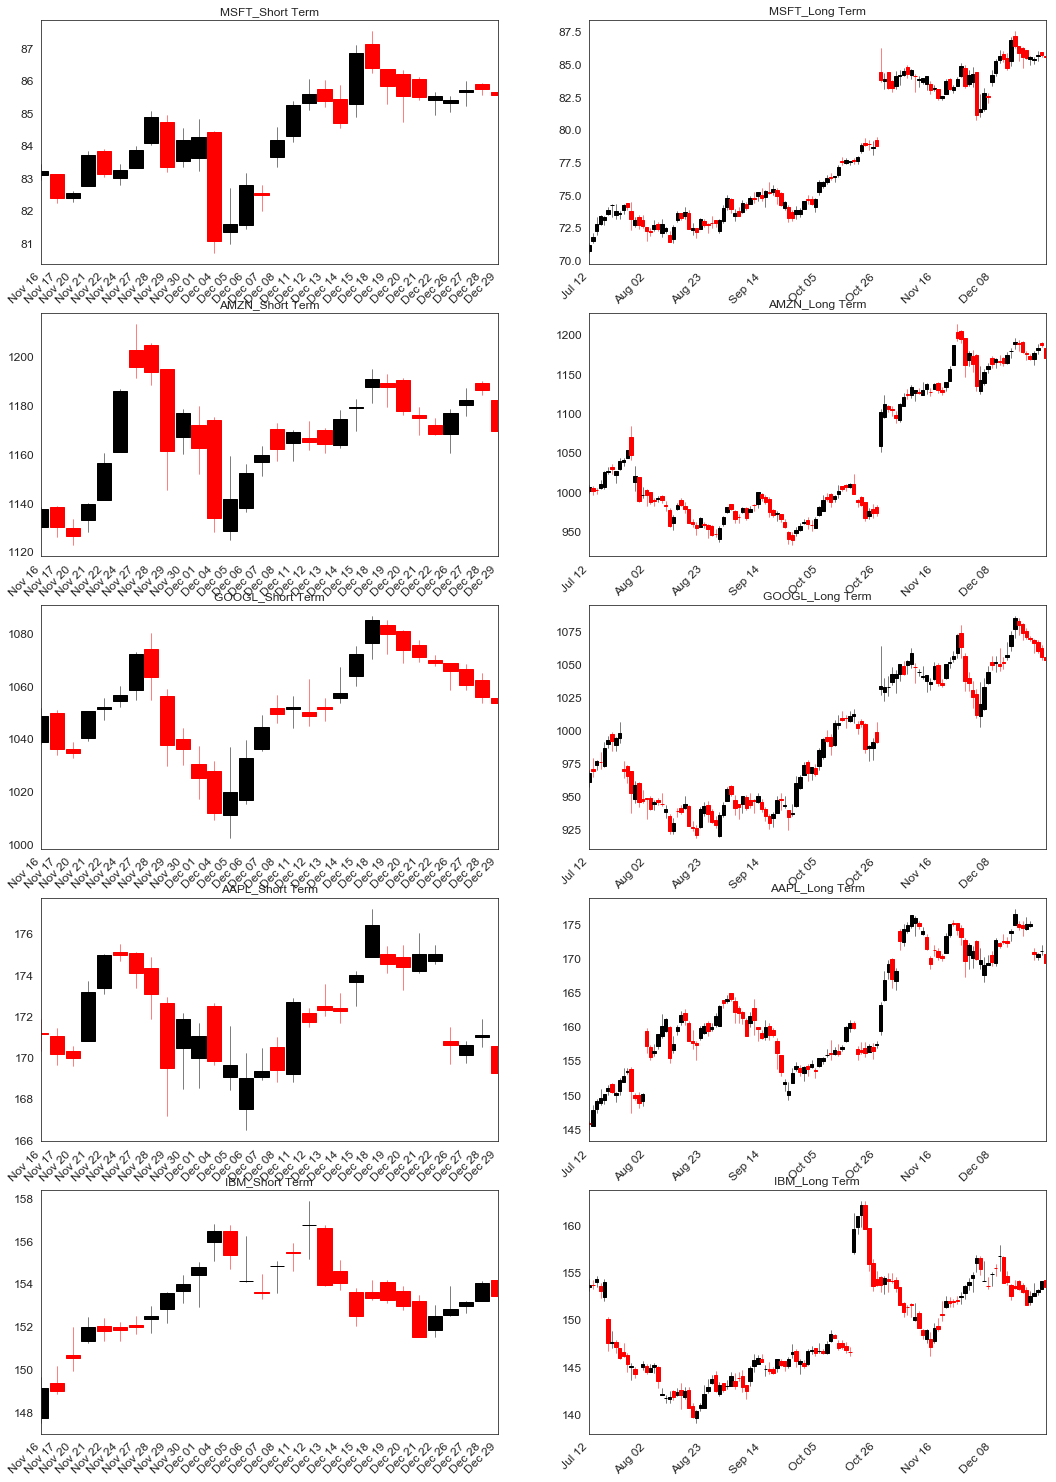

In [52]:
fig, axes = plt.subplots(nrows=5,ncols=2, figsize=(18, 26))

t5a = q4b.copy().reset_index()
for j in range(0,5):
        weekday_candlestick(t5a[t5a['Name']==list_of_dataset[j]][['Date2', 'Open', 'High', 'Low','Close']].copy().tail(30), ax=axes[j,0], fmt='%b %d', freq=1, width=0.9,colorup='black', colordown='red')
        weekday_candlestick(t5a[t5a['Name']==list_of_dataset[j]][['Date2', 'Open', 'High', 'Low','Close']].copy().tail(120), ax=axes[j,1], fmt='%b %d', freq=15, width=0.9,colorup='black', colordown='red')
        axes[j,0].set_title('{}_Short Term'.format(list_of_dataset[j]))
        axes[j,1].set_title('{}_Long Term'.format(list_of_dataset[j]))
plt.show()

##### The following density chart shows the frequency of Closing price divided by Opening price. A value of above 1 indicates that the stock price increased that day. Amazon is an interesting case in this. The peak/median for amazon is less than 1 which means that amazon lost stock price more often than not. But another point to consider is highlighted by the rectangle. Amazon had days where the daily return was above 1 percent more often than other stocks. Also the peak for amazon is lower. Which means that amazon was the most volatile stock if we consider price changes on each trading days

d:\downloads\software\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


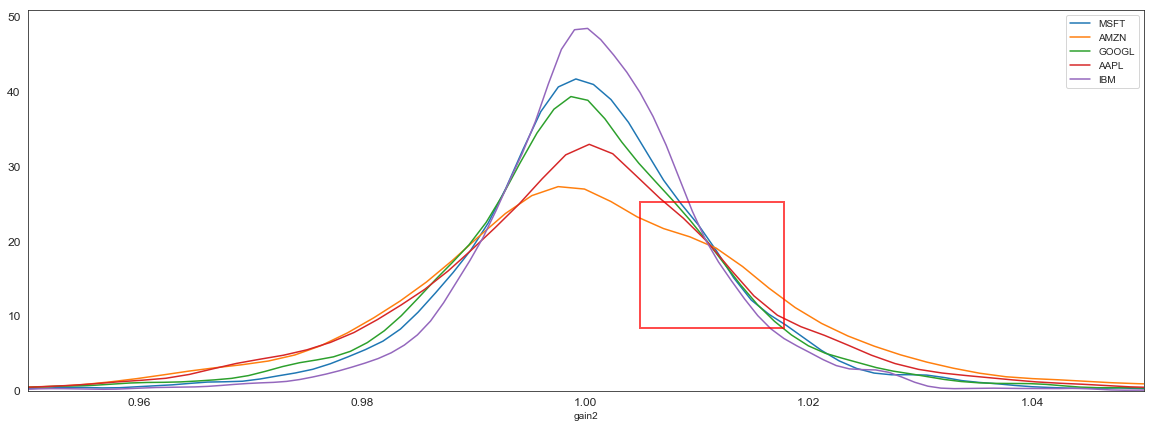

In [53]:
import matplotlib.patches as patches
t6 = q4b[q4b['Date'].dt.year>2005][['Date','gain2','Name']].copy()
t6a = t6.dropna(axis=0)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,7))
plt.xlim((0.95,1.05))
for j in range(0,5):
    sns.distplot(t6a[t6a['Name']==list_of_dataset[j]]['gain2'],hist=False, label=list_of_dataset[j])
fig.patches.extend([plt.Rectangle((0.55,0.25),0.1,0.25,
                                  fill=False, color='r',linewidth=2, alpha=0.7, zorder=100,
                                  transform=fig.transFigure, figure=fig)])



##### The following chart shows how much value of a particular company changed hands in a given month and year. Apple and Amazon again come out on top.

Text(0.5, 1.0, 'Total Value of stocks traded')

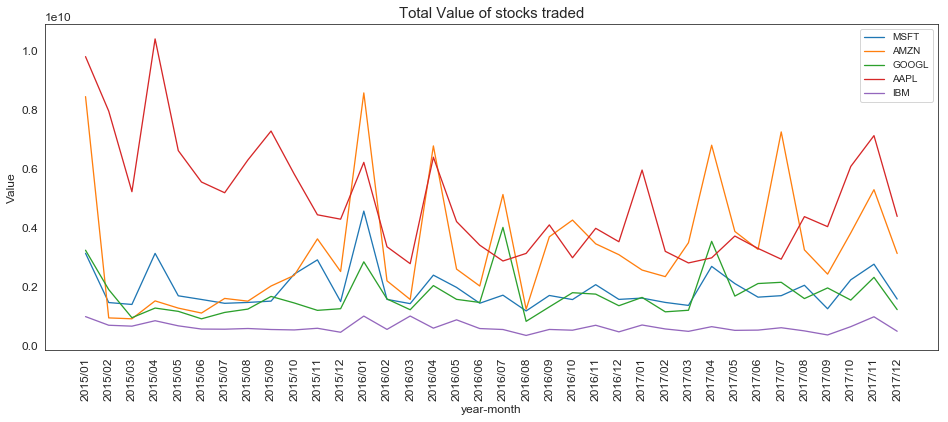

In [56]:
t7 = q4b[q4b['Date'].dt.year>2014][['YM','mktcap','Name']].copy().groupby(['YM','Name'], as_index=False).last()
plt.figure(figsize=(16,6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("year-month", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation = 90)
for i in list_of_dataset:
    t7a = t7[t7['Name'] == i]
    plt.plot(t7a.YM, t7a.mktcap, linestyle='-', linewidth=1.3, label=i)
plt.legend()
plt.title('Total Value of stocks traded', fontsize=15)